In [1]:
from itertools import combinations

import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp
from other_datasets_utils import (
    get_outcome_vars,
    load_and_process_dataset,
    rounding_dict,
)
from scipy import stats

from src.linear_mm_utils.calc_means_main import (
    calc_mm_means_for_all_outcomes,
)
from src.linear_mm_utils.constants import outcome_name_mapping
from src.linear_mm_utils.julia_linear_mm import jl, run_linear_mm
from src.linear_mm_utils.utils import exclude_IAs, dropbox_upload


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


# Means with 95% confidence intervals for eye movement measures in Each Dataset


In [2]:
dataset = "celer"

In [3]:
ia_rep, fix_rep, ia_rep_fixated_only = load_and_process_dataset(dataset=dataset)
pos_outcomes, fix_rep_outcomes, non_pos_outcomes = get_outcome_vars(dataset=dataset)

/data/home/meiri.yoav/OneStop-Eye-Movements/src/other_datasets_analyses/other_datasets_utils.py:175: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  fix_rep = pd.read_csv(


Could not convert IA_FIRST_PASS_GAZE_DURATION to numeric


In [10]:
if dataset == "onestop":
    evs = ["has_preview", "reread"]
elif dataset == "celer":
    evs = ["L1"]
else:
    evs = []

if dataset == "onestop":
    re_columns = ["subject_id", "unique_paragraph_id"]
elif dataset == "sbsat":
    re_columns = ["RECORDING_SESSION_LABEL", "page_name"]
elif dataset == "geco":
    re_columns = ["PP_NR"]
elif dataset == "celer":
    re_columns = ["list"]

In [11]:
ia_means_df = calc_mm_means_for_all_outcomes(
    df=ia_rep_fixated_only,  # type: ignore
    explanatory_variable_list=evs,
    re_columns=re_columns,
    outcomes=pos_outcomes,
    mean_mode="subset_mean",
)

if dataset != "sbsat":
    means_skip_rate = calc_mm_means_for_all_outcomes(
        df=ia_rep,
        explanatory_variable_list=evs,
        re_columns=re_columns,
        outcomes=non_pos_outcomes,
        mean_mode="subset_mean",
    )

if type(fix_rep) is pd.DataFrame:
    fix_means_df = calc_mm_means_for_all_outcomes(
        df=fix_rep,
        explanatory_variable_list=evs,
        re_columns=re_columns,
        outcomes=fix_rep_outcomes,
        mean_mode="subset_mean",
    )

outcome_variable: IA_FIRST_FIXATION_DURATION
df_m shape before dropping nan: (1452564, 106)
df_m shape after dropping nan: (1452564, 106)
u_vals: ['Gathering__0', 'Gathering__1', 'Hunting__0', 'Hunting__1']


100%|██████████| 4/4 [00:15<00:00,  3.95s/it]


outcome_variable: IA_FIRST_RUN_DWELL_TIME
df_m shape before dropping nan: (1452564, 106)
df_m shape after dropping nan: (1452564, 106)
u_vals: ['Gathering__0', 'Gathering__1', 'Hunting__0', 'Hunting__1']


100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


outcome_variable: IA_FIRST_PASS_GAZE_DURATION
df_m shape before dropping nan: (1452564, 106)
df_m shape after dropping nan: (1006744, 106)
u_vals: ['Gathering__0', 'Gathering__1', 'Hunting__0', 'Hunting__1']


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


outcome_variable: IA_DWELL_TIME
df_m shape before dropping nan: (1452564, 106)
df_m shape after dropping nan: (1452564, 106)
u_vals: ['Gathering__0', 'Gathering__1', 'Hunting__0', 'Hunting__1']


100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


outcome_variable: IA_REGRESSION_OUT_FULL_COUNT
df_m shape before dropping nan: (2532799, 105)
df_m shape after dropping nan: (2532799, 105)
u_vals: ['Gathering__0', 'Gathering__1', 'Hunting__0', 'Hunting__1']


100%|██████████| 4/4 [00:07<00:00,  1.78s/it]


outcome_variable: IA_FIXATION_COUNT
df_m shape before dropping nan: (2532799, 105)
df_m shape after dropping nan: (2532799, 105)
u_vals: ['Gathering__0', 'Gathering__1', 'Hunting__0', 'Hunting__1']


100%|██████████| 4/4 [00:06<00:00,  1.74s/it]


outcome_variable: IA_ZERO_TF
df_m shape before dropping nan: (2532799, 105)
df_m shape after dropping nan: (2532799, 105)
u_vals: ['Gathering__0', 'Gathering__1', 'Hunting__0', 'Hunting__1']


100%|██████████| 4/4 [00:06<00:00,  1.67s/it]


outcome_variable: IA_SKIP
df_m shape before dropping nan: (2532799, 105)
df_m shape after dropping nan: (2532799, 105)
u_vals: ['Gathering__0', 'Gathering__1', 'Hunting__0', 'Hunting__1']


100%|██████████| 4/4 [00:06<00:00,  1.67s/it]


outcome_variable: NEXT_SAC_AMPLITUDE
df_m shape before dropping nan: (2289445, 63)
df_m shape after dropping nan: (2270276, 63)
u_vals: ['Gathering__0', 'Gathering__1', 'Hunting__0', 'Hunting__1']


100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


outcome_variable: CURRENT_FIX_DURATION
df_m shape before dropping nan: (2289445, 63)
df_m shape after dropping nan: (2289445, 63)
u_vals: ['Gathering__0', 'Gathering__1', 'Hunting__0', 'Hunting__1']


100%|██████████| 4/4 [00:05<00:00,  1.29s/it]


In [12]:
if dataset in ["onestop", "celer"]:
    means_df = pd.concat([ia_means_df, fix_means_df, means_skip_rate], axis=0)
elif dataset == "sbsat":
    means_df = pd.concat([ia_means_df, fix_means_df], axis=0)
elif dataset == "geco":
    means_df = pd.concat([ia_means_df, means_skip_rate], axis=0)

In [16]:
means_df_styled = means_df.copy()


# round values if 'mean' and '2se' according to rounding dict by outcome_variable value
def means_df_to_table(means_df):
    for outcome_variable in pos_outcomes + fix_rep_outcomes + non_pos_outcomes:
        means_df.loc[means_df["outcome_variable"] == outcome_variable, "mean"] = (
            means_df.loc[
                means_df["outcome_variable"] == outcome_variable, "mean"
            ].round(rounding_dict[outcome_variable])
        )
        means_df.loc[means_df["outcome_variable"] == outcome_variable, "2se"] = (
            means_df.loc[
                means_df["outcome_variable"] == outcome_variable, "2se"
            ].round(rounding_dict[outcome_variable])
        )

    means_df["mean_sd_str"] = (
        "$"
        + means_df["mean"].astype(str)
        + r"_{\pm "
        + (means_df["2se"]).astype(str)
        + "}$"
    )

    # replace each value in 'outcome_variable' with its value in the dict outcome_name_mapping
    means_df["outcome_variable"] = means_df["outcome_variable"].map(
        outcome_name_mapping, na_action="ignore"
    )

    return means_df


means_df_styled = means_df_to_table(means_df_styled)

if dataset in ["onestop", "celer"]:
    means_df_pivot = means_df_styled.pivot(
        index="outcome_variable",
        columns=evs,
        values="mean_sd_str",
    )

    means_df_styled = means_df_pivot.loc[
        list(
            map(
                lambda x: outcome_name_mapping[x],
                pos_outcomes + non_pos_outcomes + fix_rep_outcomes,
            )
        ),
        :,
    ]

means_df_styled

has_preview                         Gathering                     \
reread                                      0                  1   
outcome_variable                                                   
First Fixation Duration     $193.7_{\pm 3.9}$  $186.1_{\pm 3.8}$   
Gaze Duration               $214.6_{\pm 5.2}$  $200.0_{\pm 4.7}$   
First Pass Gaze Duration    $218.4_{\pm 5.4}$  $201.4_{\pm 4.9}$   
Total Fixation Duration    $306.6_{\pm 10.9}$  $248.3_{\pm 8.4}$   
Regression Rate             $0.23_{\pm 0.01}$  $0.13_{\pm 0.01}$   
Fixation Count              $1.04_{\pm 0.05}$  $0.68_{\pm 0.04}$   
Global Skip Rate (TF = 0)   $0.36_{\pm 0.01}$   $0.5_{\pm 0.02}$   
Skip Rate                   $0.55_{\pm 0.02}$  $0.64_{\pm 0.02}$   
Saccade Length               $14.8_{\pm 0.4}$   $16.7_{\pm 0.5}$   
Single Fixation Duration    $191.6_{\pm 3.7}$  $185.0_{\pm 3.7}$   

has_preview                          Hunting                     
reread                                     0                  1  
outcome_variable                                                 
First Fixation Duration    $186.5_{\pm 3.4}$  $178.9_{\pm 3.2}$  
Gaze Duration              $200.9_{\pm 4.2}$  $187.5_{\pm 3.7}$  
First Pass Gaze Duration   $203.3_{\pm 4.3}$  $187.9_{\pm 3.8}$  
Total Fixation Duration    $283.6_{\pm 7.9}$  $236.9_{\pm 6.7}$  
Regression Rate             $0.2_{\pm 0.01}$   $0.1_{\pm 0.01}$  
Fixation Count             $0.88_{\pm 0.04}$  $0.48_{\pm 0.03}$  
Global Skip Rate (TF = 0)  $0.43_{\pm 0.02}$  $0.64_{\pm 0.02}$  
Skip Rate                  $0.61_{\pm 0.02}$  $0.76_{\pm 0.02}$  
Saccade Length              $15.9_{\pm 0.5}$   $17.6_{\pm 0.5}$  
Single Fixation Duration   $185.8_{\pm 3.3}$  $178.8_{\pm 3.2}$

## OneStop Comparisons - Has_preview $\times$ Reread 


In [ ]:
ia_rep, fix_rep, ia_rep_fixated_only = load_and_process_dataset(dataset="onestop")
pos_outcomes, fix_rep_outcomes, non_pos_outcomes = get_outcome_vars(dataset="onestop")

In [21]:
# link_dist_dict is a dict with

link_dist_dict = {
    outcome: jl.Distributions.Normal()
    for outcome in pos_outcomes + fix_rep_outcomes + non_pos_outcomes
}


link_dist_dict["IA_FIXATION_COUNT"] = jl.Distributions.Normal()  # type: ignore
link_dist_dict["IA_SKIP"] = jl.Distributions.Normal()  # type: ignore
link_dist_dict["IA_ZERO_TF"] = jl.Distributions.Normal()  # type: ignore
link_dist_dict["NEXT_SAC_AMPLITUDE"] = jl.Distributions.Normal()

In [22]:
import time

comparisons_lists = {}

for outcome in pos_outcomes + ["IA_SKIP", "IA_ZERO_TF"] + fix_rep_outcomes:
    curr_time = time.time()

    if outcome in pos_outcomes:
        curr_df = ia_rep_fixated_only.copy()
    elif outcome in ["IA_SKIP", "IA_ZERO_TF"]:
        curr_df = ia_rep.copy()
    elif outcome in fix_rep_outcomes:
        curr_df = fix_rep.copy()

    # remove all rows where the outcome contains nan
    curr_df = curr_df.dropna(subset=[outcome])

    outcome_p_vals_lst = []
    # Inside Gathering: FR vs. RR
    for hp_val in ["Hunting", "Gathering"]:
        coefs, _ = run_linear_mm(
            df_input=curr_df.query(f"has_preview == '{hp_val}'"),
            re_cols=["subject_id", "unique_paragraph_id"],
            outcome_variable=outcome,
            link_dist=link_dist_dict[outcome],
            formula=f"{outcome} ~ reread + (1 + reread | subject_id) + (1 + reread | unique_paragraph_id)",
            print_model_res=False,
        )
        outcome_p_vals_lst.append(
            float(coefs.loc[coefs["Name"] == "reread"]["Pr(>|z|)"].values[0])  # type: ignore
        )

    curr_df["has_preview"] = curr_df["has_preview"].map({"Hunting": 1, "Gathering": 0})
    for RR_val in [0, 1]:
        coefs, _ = run_linear_mm(
            df_input=curr_df.query(f"reread == {RR_val}"),
            re_cols=["subject_id", "unique_paragraph_id"],
            outcome_variable=outcome,
            link_dist=link_dist_dict[outcome],
            formula=f"{outcome} ~ has_preview + (1 | subject_id) + (1 + has_preview | unique_paragraph_id)",
            print_model_res=False,
        )
        outcome_p_vals_lst.append(
            float(coefs.loc[coefs["Name"] == "has_preview"]["Pr(>|z|)"].values[0])  # type: ignore
        )

    comparisons_lists[outcome] = outcome_p_vals_lst
    end_time = time.time()

    print(f"Time for {outcome}: {end_time - curr_time}")


Time for IA_FIRST_FIXATION_DURATION: 9.777475357055664
Time for IA_FIRST_RUN_DWELL_TIME: 10.77896785736084
Time for IA_FIRST_PASS_GAZE_DURATION: 8.941622018814087
Time for IA_DWELL_TIME: 9.72004771232605
Time for IA_SKIP: 15.859427452087402
Time for IA_ZERO_TF: 18.362783670425415
Time for NEXT_SAC_AMPLITUDE: 13.876774072647095
Time for CURRENT_FIX_DURATION: 12.941179513931274


In [24]:
pd.DataFrame(comparisons_lists)

,IA_FIRST_FIXATION_DURATION,IA_FIRST_RUN_DWELL_TIME,IA_FIRST_PASS_GAZE_DURATION,IA_DWELL_TIME,IA_SKIP,IA_ZERO_TF,NEXT_SAC_AMPLITUDE,CURRENT_FIX_DURATION
0,1.780807e-25,4.994712e-47,3.194146e-51,3.108847e-62,1.073549e-120,8.147545e-179,3.604977e-74,1.775915e-23
1,5.389258e-26,3.792187e-49,1.300008e-55,3.400843e-70,7.333160e-64,6.727799e-113,6.077370e-91,9.172452e-22
2,6.408005e-03,5.083444e-05,1.520236e-05,4.609489e-04,6.373326e-10,4.509028e-13,8.511741e-04,2.167473e-02
3,4.835347e-03,4.129025e-05,2.327122e-05,3.075912e-02,1.378149e-29,9.073196e-29,3.707514e-03,1.179091e-02


# All Datasets - Compare Means for All Measures

In [33]:
from other_datasets_utils import (
    participant_id_col_name_datasets,
    item_id_col_name_datasets,
)

dataset_names = ["onestop", "geco", "sbsat", "celer"]


def create_dataset_dict(dataset_name: str):
    ia_rep, fix_rep, ia_rep_fixated_only = load_and_process_dataset(
        dataset=dataset_name
    )
    pos_outcomes, fix_rep_outcomes, non_pos_outcomes = get_outcome_vars(
        dataset=dataset_name
    )
    return {
        "ia_rep": ia_rep,
        "fix_rep": fix_rep,
        "ia_rep_fixated_only": ia_rep_fixated_only,
        "pos_outcomes": pos_outcomes,
        "fix_rep_outcomes": fix_rep_outcomes,
        "non_pos_outcomes": non_pos_outcomes,
    }


datasets_dict = {name: create_dataset_dict(name) for name in dataset_names}

Could not convert IA_FIRST_PASS_GAZE_DURATION to numeric
Could not convert IA_FIRST_PASS_GAZE_DURATION to numeric


/data/home/meiri.yoav/OneStop-Eye-Movements/src/other_datasets_analyses/other_datasets_utils.py:161: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  fix_rep = pd.read_csv(


Could not convert IA_FIRST_PASS_GAZE_DURATION to numeric


In [53]:
temp_item_id_col_name = "item_id"
temp_participant_id_col_name = "participant_id"

# create a dict of (dataset1_name, dataset2_name) -> (outcome_variable -> p_value)
def perform_ttest(data1, data2, outcome_key):
    test_res = stats.ttest_ind(
        data1[outcome_key],
        data2[outcome_key],
        alternative="two-sided",
        nan_policy="omit",
        equal_var=False,
    )  # make the pval a float
    pval = test_res.pvalue
    return "{:e}".format(pval)


def compare_two_datasets(dataset1_dict: dict, dataset2_dict: dict):
    outcome_types = {
        "pos_outcomes": ("ia_rep_fixated_only", "ia_rep_fixated_only"),
        "fix_rep_outcomes": ("fix_rep", "fix_rep"),
        "non_pos_outcomes": ("ia_rep", "ia_rep"),
    }

    comparison_results = []

    # Iterate through each outcome type
    for outcome_key, (data_key1, data_key2) in outcome_types.items():
        curr_dataset1 = dataset1_dict[data_key1]
        
        outcomes_to_compare = set(dataset1_dict[outcome_key]).intersection(
            dataset2_dict[outcome_key]
        )

        # Perform t-tests on the common outcomes
        for outcome in outcomes_to_compare:
            p_value = perform_ttest(
                dataset1_dict[data_key1], dataset2_dict[data_key2], outcome
            )
            comparison_results.append((outcome, p_value))

    return comparison_results


comparisons_dict = {}
for dataset1_name, dataset2_name in combinations(dataset_names, 2):
    comparisons_dict[(dataset1_name, dataset2_name)] = compare_two_datasets(
        datasets_dict[dataset1_name], datasets_dict[dataset2_name]
    )

/tmp/ipykernel_3138233/569167697.py:7: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  test_res = stats.ttest_ind(


In [56]:
# Pivot the DataFrame so that the rows become the variable names (metrics)
# Create a dataframe from the input data
data = []
for key, values in comparisons_dict.items():
    for metric, value in values:
        data.append([key[0], key[1], metric, value])

df = pd.DataFrame(data, columns=["Dataset1", "Dataset2", "Metric", "Value"])

pivot_df = df.pivot_table(
    index="Metric", columns=["Dataset1", "Dataset2"], values="Value", aggfunc="first"
)

pivot_df.columns = ["_".join(col).strip() for col in pivot_df.columns.values]


In [57]:
pivot_df

,geco_celer,geco_sbsat,onestop_celer,onestop_geco,onestop_sbsat,sbsat_celer
Metric,,,,,,
CURRENT_FIX_DURATION,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
IA_DWELL_TIME,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
IA_FIRST_FIXATION_DURATION,0.000000e+00,3.394039e-52,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
IA_FIRST_PASS_GAZE_DURATION,nan,nan,0.000000e+00,nan,6.974993e-103,0.000000e+00
IA_FIRST_RUN_DWELL_TIME,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
IA_FIXATION_COUNT,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN
IA_REGRESSION_OUT_FULL_COUNT,NaN,NaN,0.000000e+00,NaN,NaN,NaN
IA_SKIP,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN
IA_ZERO_TF,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN


# OneStop - Response to Linguistic Word Properties  


In [2]:
dataset = "onestop"
ia_rep, fix_rep, ia_rep_fixated_only = load_and_process_dataset(dataset=dataset)
pos_outcomes, fix_rep_outcomes, non_pos_outcomes = get_outcome_vars(dataset=dataset)

Could not convert IA_FIRST_PASS_GAZE_DURATION to numeric


In [3]:
fix_rep = fix_rep.merge(
    ia_rep[
        ["unique_paragraph_id", "IA_ID", "end_of_line", "start_of_line", "reread"]
    ].drop_duplicates(),
    on=["unique_paragraph_id", "IA_ID", "reread"],
    how="left",
)

In [4]:
#! Exclude beginning / end of paragraph line, words with punctuations, numbers
ia_rep_fixated_only = ia_rep[ia_rep["IA_DWELL_TIME"] > 0]

ia_rep_fixated_only = exclude_IAs(ia_rep_fixated_only, remove_start_end_of_line=False)
fix_rep = exclude_IAs(fix_rep, remove_start_end_of_line=False)

In [5]:
class config:
    def __init__(self):
        self.method = "MM_coeffs"
        self.outcome_variable = "log_IA_DWELL_TIME"
        self.explanatory_variable: str | list[str] = "reread"
        self.data_path = "data"

        self.fig_path = "src/figures"
        self.exclusion_df: bool = True
        self.model_formula: str = ""
        # self.log_transform_outcome = False
        self.z_score_w_r_t_explanatory = True
        # query is article_ind_of_first_reading >= 0
        self.df_query = ""
        self.re_columns = ["subject_id", "unique_paragraph_id"]

        self.config_name = (
            "Coeffs. " + self.outcome_variable + "_" + self.explanatory_variable
        )


In [6]:
explanatory_var_class_names = {
    "reread": {
        0: "First reading",
        1: "Repeated Reading",
        "0": "First Reading",
        "1": "Repeated Reading",
    },
    "has_preview_reread": {
        "Gathering_1": "Gathering, RR",
        "Gathering_0": "Gathering, Not RR",
        "Hunting_1": "Hunting, RR",
        "Hunting_0": "Hunting, Not RR",
    },
    "has_preview": {
        "Hunting": "Hunting",
        "Gathering": "Gathering",
    },
}

explanatory_var_names = {
    "has_preview": "Condition",
    "relative_to_aspan": "Relative to Critical Span",
    "article_ind_of_first_reading": "Article Index of the First Reading",
    "first_second_reading_types": "First (<10, 10) and Second (11, 12) Readings",
    "article_ind_group_of_first_reading": "Article Index of the First Reading",
    "reread": "Reread",
    "has_preview_reread": "Condition and Reread",
}


# # init wandb
# import wandb
# wandb.login()

z_score_w_r_t_explanatory = False

# evs = ["reread", "has_preview"]
evs = []
# ev_list = ["article_ind_of_first_reading"]

cfg = config()


cfg.z_score_w_r_t_explanatory = z_score_w_r_t_explanatory
z_score_text = "" if not cfg.z_score_w_r_t_explanatory else " (z-scored)"

cfg.explanatory_variable = evs


In [7]:
mode = "standard"  # standard, z_has_preview, z_combination, posi, z_reread


for outcome in [
    "IA_FIRST_FIXATION_DURATION",
    "IA_FIRST_RUN_DWELL_TIME",
    "IA_DWELL_TIME",
]:
    print("------------------------------------------")
    print(outcome)
    print("------------------------------------------")
    ling_featurse_formula = f"""
        {outcome} ~ 1 + subtlex_Frequency + Length + gpt2_Surprisal + prev_subtlex_Frequency + prev_gpt2_Surprisal + prev_Length +
            (1 + subtlex_Frequency + Length + gpt2_Surprisal | subject_id) + 
            (1 + subtlex_Frequency + Length + gpt2_Surprisal | unique_paragraph_id)
    """
    df_query = f"{outcome} >= 0" if mode != "posi" else f"{outcome} > 0"
    if df_query != "":
        df = ia_rep_fixated_only.query(df_query).copy()
        # df['IA_DWELL_TIME'] = np.log(df["IA_DWELL_TIME"])
    else:
        df = ia_rep_fixated_only.copy()

    df = df[
        [
            "gpt2_Surprisal",
            "subtlex_Frequency",
            "Length",
            "prev_subtlex_Frequency",
            "prev_gpt2_Surprisal",
            "prev_Length",
            "has_preview",
            "reread",
            "unique_paragraph_id",
            "subject_id",
        ]
        + [outcome]
    ]
    df = df.query("subtlex_Frequency > 0")

    df = df.dropna()

    # centralize the covariates
    df["subtlex_Frequency"] = df["subtlex_Frequency"] - df["subtlex_Frequency"].mean()
    df["gpt2_Surprisal"] = df["gpt2_Surprisal"] - df["gpt2_Surprisal"].mean()
    df["Length"] = df["Length"] - df["Length"].mean()
    df["prev_subtlex_Frequency"] = (
        df["prev_subtlex_Frequency"] - df["subtlex_Frequency"].mean()
    )
    df["prev_gpt2_Surprisal"] = df["prev_gpt2_Surprisal"] - df["gpt2_Surprisal"].mean()
    df["prev_Length"] = df["prev_Length"] - df["Length"].mean()

    # take df, and normalize the ourcome variable seperately for Hunting and Gathering
    if mode == "z_has_preview":
        df[outcome] = df.groupby("has_preview")[outcome].apply(
            lambda x: (x - x.mean()) / x.std()
        )

    if mode == "z_reread":
        df[outcome] = df.groupby("reread")[outcome].apply(
            lambda x: (x - x.mean()) / x.std()
        )

    if mode == "z_combination":
        df[outcome] = df.groupby(["has_preview", "reread"])[outcome].apply(
            lambda x: (x - x.mean()) / x.std()
        )

    if type(evs) is list and len(evs) > 1:
        cfg.explanatory_variable = "_".join(evs)
        df[cfg.explanatory_variable] = df[evs].apply(
            lambda x: "_".join([str(i) for i in x]), axis=1
        )
        res = (
            df.groupby(cfg.explanatory_variable)
            .apply(
                lambda x: run_linear_mm(
                    x,
                    outcome,
                    cfg.re_columns,
                    ling_featurse_formula,
                    model_res_var_name="j_model_mm",
                    link_dist=jl.Distributions.Normal()
                    if cfg.outcome_variable != "IA_SKIP"
                    else jl.Distributions.Bernoulli(),
                    z_outcome=z_score_w_r_t_explanatory,
                    centralize_covariates=False,
                    print_model_res=False,
                )[0]
            )
            .reset_index()
            .drop(columns=["level_1"])
        )

        # seperate the explanatory variable into its components in res
        res[cfg.explanatory_variable] = res[cfg.explanatory_variable].apply(
            lambda x: x.split("_")
        )
        for i in range(len(evs)):
            res[evs[i]] = res[cfg.explanatory_variable].apply(lambda x: x[i])
        res = res.drop(columns=[cfg.explanatory_variable])
        # turn the numeric evs back to numeric if it's possible (is_numeric)
        for ev in evs:
            res[ev] = pd.to_numeric(res[ev], errors="ignore")

    else:
        res = run_linear_mm(
            df.query("has_preview == 'Gathering' and reread == 0"),
            outcome,
            cfg.re_columns,
            ling_featurse_formula,
            link_dist=jl.Distributions.Normal()
            if cfg.outcome_variable != "IA_SKIP"
            else jl.Distributions.Bernoulli(),
            z_outcome=z_score_w_r_t_explanatory,
            centralize_covariates=False,
            print_model_res=False,
        )[0]

    # remove from res the interaction term
    res = res.query("Name != 'subtlex_Frequency & Length'")
    res["2se"] = res["Std. Error"].round(2)
    print(res[["Name", "Coef.", "2se"]])

------------------------------------------
IA_FIRST_FIXATION_DURATION
------------------------------------------
                     Name       Coef.   2se
0             (Intercept)  195.238984  2.08
1       subtlex_Frequency    0.956796  0.07
2                  Length   -0.488816  0.12
3          gpt2_Surprisal    1.230692  0.08
4  prev_subtlex_Frequency   -0.133432  0.03
5     prev_gpt2_Surprisal    0.424334  0.04
6             prev_Length   -0.544728  0.06
------------------------------------------
IA_FIRST_RUN_DWELL_TIME
------------------------------------------
                     Name       Coef.   2se
0             (Intercept)  212.857661  2.66
1       subtlex_Frequency    1.081008  0.11
2                  Length    3.519107  0.27
3          gpt2_Surprisal    2.262170  0.15
4  prev_subtlex_Frequency   -0.131949  0.04
5     prev_gpt2_Surprisal    0.770699  0.05
6             prev_Length   -1.024143  0.08
------------------------------------------
IA_DWELL_TIME
----------------

In [135]:
fig = sp.make_subplots(
    rows=1,
    cols=3,
    subplot_titles=["Surprisal", "Frequency", "Length"],
    vertical_spacing=0.1,
)
colors = [
    "#347BB9",
    "#AE0135",
    "#003366",
]
# create a subplot for each value of ['gpt2_Surprisal', 'Wordfreq_Frequency', 'Length']
# in each subplot create a primary x axis for the has_preview and a secondary x axis for the first_second_reading types
# Use Coef. for the bar values and Std. Error for the error bars

has_preview_vars = ["Hunting", "Gathering"]
hp_colors = colors[0:3]
reread_vars = [0, 1]
fsrt_colors = colors[0:3]


for i, ling_feature in enumerate(["gpt2_Surprisal", "Wordfreq_Frequency", "Length"]):
    # add a secondary x axis for the first_second_reading_types

    for j, rr_val in enumerate(reread_vars):
        hp_res = res.loc[lambda x: x["reread"] == rr_val]
        fig.add_trace(
            go.Bar(
                x=hp_res.loc[lambda x: x["Name"] == ling_feature]["has_preview"],
                y=hp_res.loc[lambda x: x["Name"] == ling_feature]["Coef."],
                error_y=dict(
                    type="data",
                    array=hp_res.loc[lambda x: x["Name"] == ling_feature]["Std. Error"]
                    * 2,
                ),
                name="First Reading" if j == 0 else "Repeated Reading",
                marker=dict(color=fsrt_colors[j]),
                showlegend=True if i == 0 else False,
            ),
            row=1,
            col=i + 1,
        )
    fig.update_layout(
        plot_bgcolor="rgba(0,0,0,0)",
        # xaxis=dict(gridcolor="LightGray"),
        yaxis=dict(gridcolor="LightGray"),
    )

    # # set the x axis title to ling_feature
    # fig.update_xaxes(
    #     title_text=ling_feature,
    #     # set the font size of the title to 18
    #     title_font=dict(size=35),
    #     # set the tock font to 25
    #     tickfont=dict(size=30),
    #     row=i+1,
    #     col=1,
    # )
    fig.update_yaxes(
        # title_text=f"Coefficient {'(Z outcome)' if z_score_w_r_t_explanatory else ''}" if i == 0 else "",
        title_text="Coefficient" if i == 0 else "",
        title_font=dict(size=25),
        tickfont=dict(size=14),
        row=1,
        col=i + 1,
    )

fig.update_layout(
    height=350,
    width=1000,
)

# increse all font by 10
fig.update_layout(font=dict(size=25))
fig.update_annotations(font_size=25)

for i in range(3):
    # turn the grid background to white
    fig["layout"]["yaxis" + str(i + 1)]["showgrid"] = True
    fig["layout"]["yaxis" + str(i + 1)]["gridcolor"] = "lightgray"
# remove all margins
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30, pad=0))
# move the legend to the bottom
fig = fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=-0.35,
        xanchor="center",
        x=0.5,
        font=dict(size=25),
        orientation="h",
    )
)

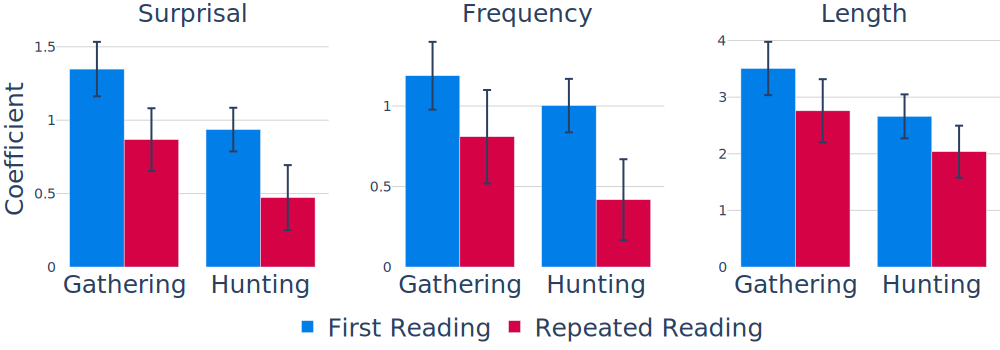

In [136]:
fig.show(renderer="svg")

In [137]:
dropbox_upload(
    project="OneStopGaze - Data Descriptor submissions to Scientific Data",
    path="figures/response_to_ling.pdf",
    fig=fig,
)

# OneStop - Reading Comprehension Means

In [2]:
ia_rep, fix_rep, ia_rep_fixated_only = load_and_process_dataset(dataset="onestop")
pos_outcomes, fix_rep_outcomes, non_pos_outcomes = get_outcome_vars(dataset="onestop")

Could not convert IA_FIRST_PASS_GAZE_DURATION to numeric


In [4]:
paragraph_aggregated_df = ia_rep[
    ["subject_id", "unique_paragraph_id", "reread", "has_preview", "is_correct"]
].drop_duplicates()

_ = run_linear_mm(
    df_input=paragraph_aggregated_df,
    outcome_variable="is_correct",
    re_cols=["subject_id", "unique_paragraph_id"],
    formula="is_correct ~ reread * has_preview + (reread * has_preview | subject_id) + (reread * has_preview | unique_paragraph_id)",
    link_dist=jl.Distributions.Normal(),
)

Linear mixed model fit by maximum likelihood
 is_correct ~ 1 + reread + has_preview + reread & has_preview + (1 + reread + has_preview + reread & has_preview | subject_id) + (1 + reread + has_preview + reread & has_preview | unique_paragraph_id)
   logLik   -2 logLik     AIC       AICc        BIC    
 -8647.0189 17294.0379 17344.0379 17344.0936 17545.4710

Variance components:
                                Column             Variance   Std.Dev.    Corr.
subject_id          (Intercept)                    0.00614669 0.07840080
                    reread                         0.00002122 0.00460659 -1.00
                    has_preview: Hunting           0.00692365 0.08320846 -0.77 +0.77
                    reread & has_preview: Hunting  0.00010210 0.01010434 +0.19 -0.19 -0.77
unique_paragraph_id (Intercept)                    0.00978648 0.09892661
                    reread                         0.00233560 0.04832803 -0.27
                    has_preview: Hunting           0.0015697

## 

## Relationship between reading comprehension and reading speed

In [5]:
subject_correct_speed_df = (
    ia_rep.query("reread == 0")[["subject_id", "is_correct", "IA_DWELL_TIME"]]
    .groupby("subject_id")
    .agg({"is_correct": "mean", "IA_DWELL_TIME": "mean"})
)

# create a simple linear model for the relationship between the mean IA_DWELL_TIME and the mean is_correct

slope, intercept, r_value, p_value, std_err = stats.linregress(
    subject_correct_speed_df["IA_DWELL_TIME"], subject_correct_speed_df["is_correct"]
)

print(f"R^2: {r_value**2}, p-value: {p_value}")

R^2: 0.0010574192803742449, p-value: 0.5385532079294629
